## **TP1 - Gustavo Uñapillco**

#### **Diagrama de tablas**

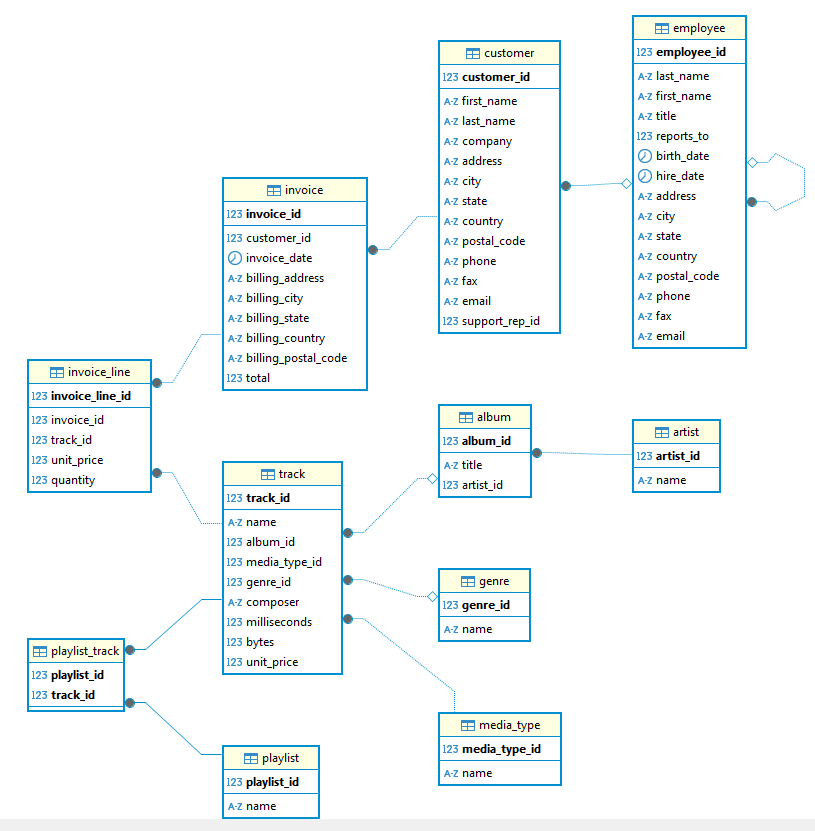

#### **1. Selecciona todos los registros de la tabla Albums.**

``` sql -- 
SELECT * FROM album
```

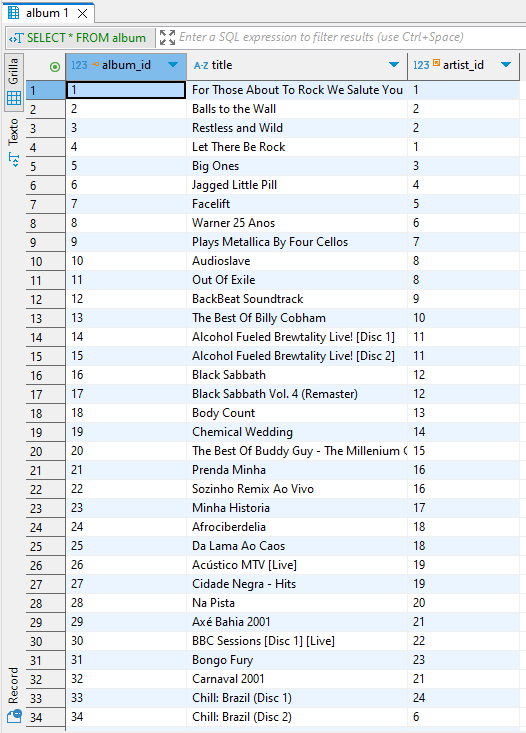

#### **2. Selecciona todos los géneros únicos de la tabla Genres.**



``` sql -- 
SELECT DISTINCT name FROM genre 
```

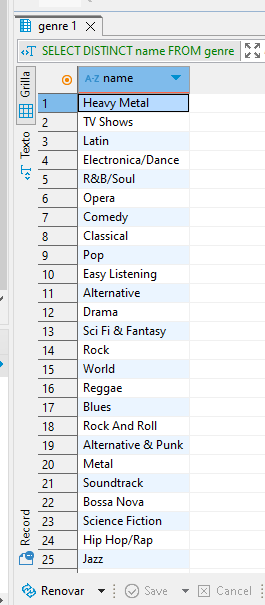

#### **3. Cuenta el número de pistas por género.**

``` sql -- 
SELECT g.genre_id, g.name AS genre_name, COUNT(*) AS track_count
FROM track t
JOIN genre g ON t.genre_id = g.genre_id
GROUP BY g.genre_id, g.name
ORDER BY g.genre_id;
```

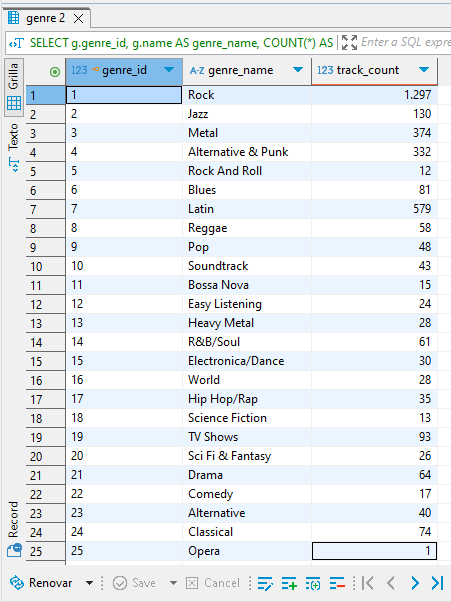

#### **4. Encuentra la longitud total (en milisegundos) de todas las pistas para cada álbum.**


``` sql -- 
SELECT a.album_id, a.title AS album_title, SUM(t.milliseconds) AS total_length
FROM track t
JOIN album a ON t.album_id = a.album_id
GROUP BY a.album_id, a.title
ORDER BY a.album_id;
```

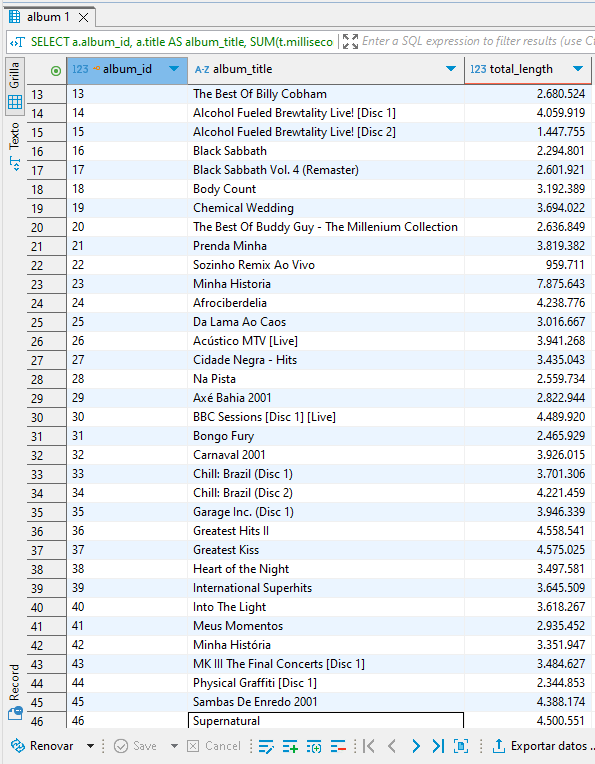

#### **5. Lista los 10 álbumes con más pistas.**


``` sql -- 
SELECT a.album_id, a.title AS album_title, COUNT(t.track_id) AS track_count
FROM album a
JOIN track t ON a.album_id = t.album_id
GROUP BY a.album_id, a.title
ORDER BY track_count DESC
LIMIT 10;
```

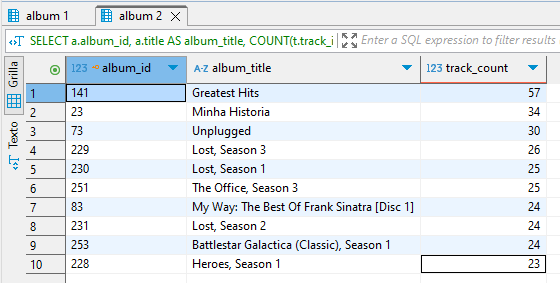

#### **6. Encuentra la longitud promedio de la pista para cada género.**


``` sql -- 
SELECT g.genre_id, g.name AS genre_name, AVG(milliseconds) AS avg_length
FROM track t
JOIN genre g ON t.genre_id = g.genre_id
GROUP BY g.genre_id, g.name
ORDER BY g.genre_id;
```

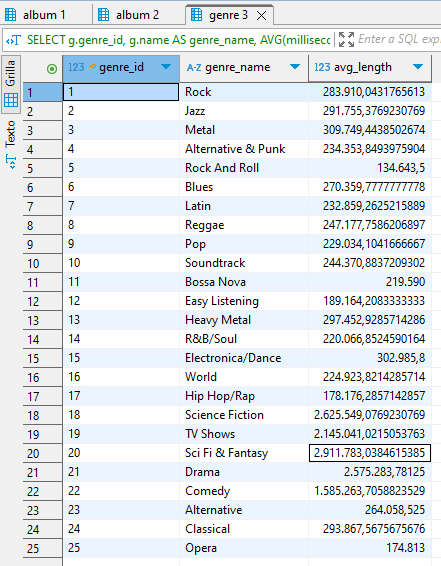

#### **7. Para cada cliente, encuentra la cantidad total que han gastado.**


``` sql -- 
SELECT c.customer_id, c.first_name, c.last_name, SUM(i.total) AS total_spent
FROM invoice i
JOIN customer c ON i.customer_id = c.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY c.customer_id; 
```

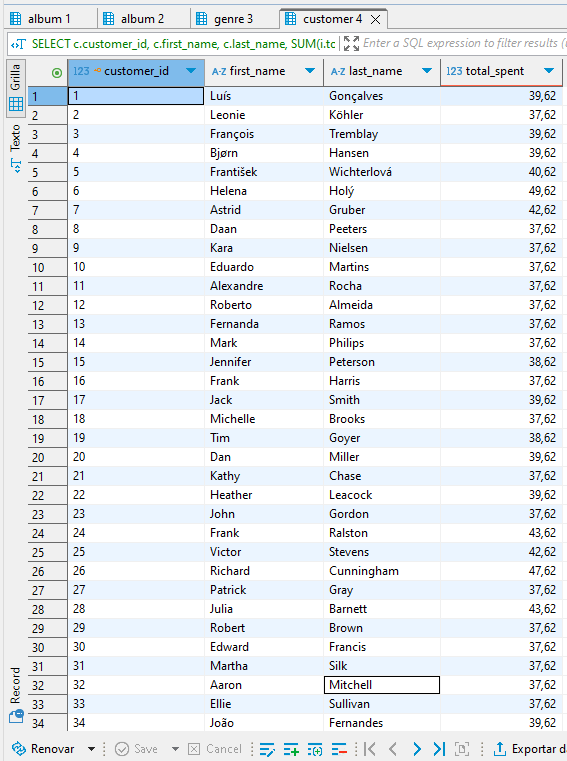

#### **8. Para cada país, encuentra la cantidad total gastada por los clientes.**


``` sql -- 
SELECT country, SUM(total) AS total_spent 
FROM invoice 
JOIN customer ON invoice.customer_id = customer.customer_id
GROUP BY country;
```

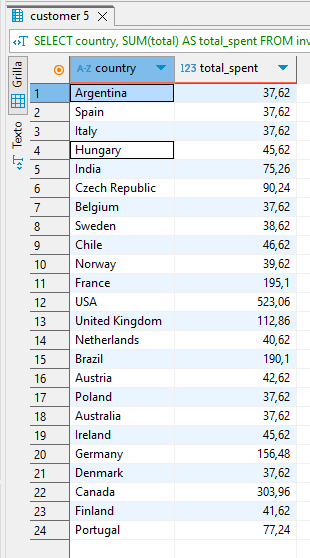

#### **9. Clasifica a los clientes en cada país por la cantidad total que han gastado.**


``` sql -- 
SELECT 
    s.customer_id,
    c.first_name,
    c.last_name,
    c.country,
    s.total_spent,
    RANK() OVER (PARTITION BY c.country ORDER BY s.total_spent DESC) AS rank_in_country
FROM (
    SELECT customer_id, SUM(total) AS total_spent
    FROM invoice
    GROUP BY customer_id
) AS s
JOIN customer c ON s.customer_id = c.customer_id;
```

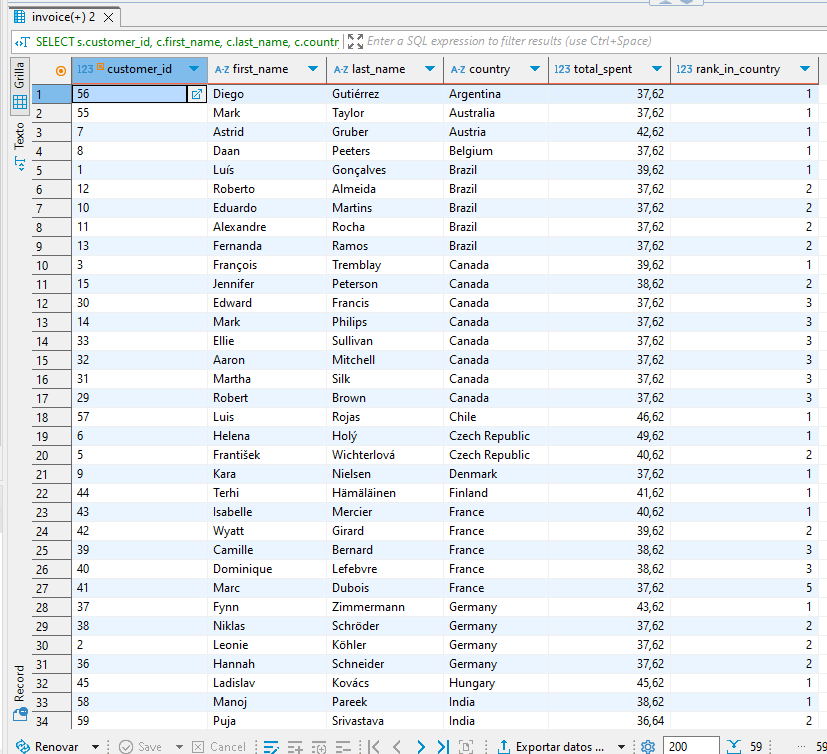

#### **10. Para cada artista, encuentra el álbum con más pistas y clasifica a los artistas por este número.**


``` sql -- 
SELECT artist_name, album_title, track_count
FROM (
    SELECT ar.name AS artist_name,
           al.title AS album_title,
           COUNT(t.track_id) AS track_count,
           RANK() OVER (PARTITION BY ar.artist_id ORDER BY COUNT(t.track_id) DESC) AS rank
    FROM artist ar
    JOIN album al ON ar.artist_id = al.artist_id
    JOIN track t ON al.album_id = t.album_id
    GROUP BY ar.artist_id, ar.name, al.album_id, al.title
) AS ranked_albums
WHERE rank = 1
ORDER BY track_count DESC;
```

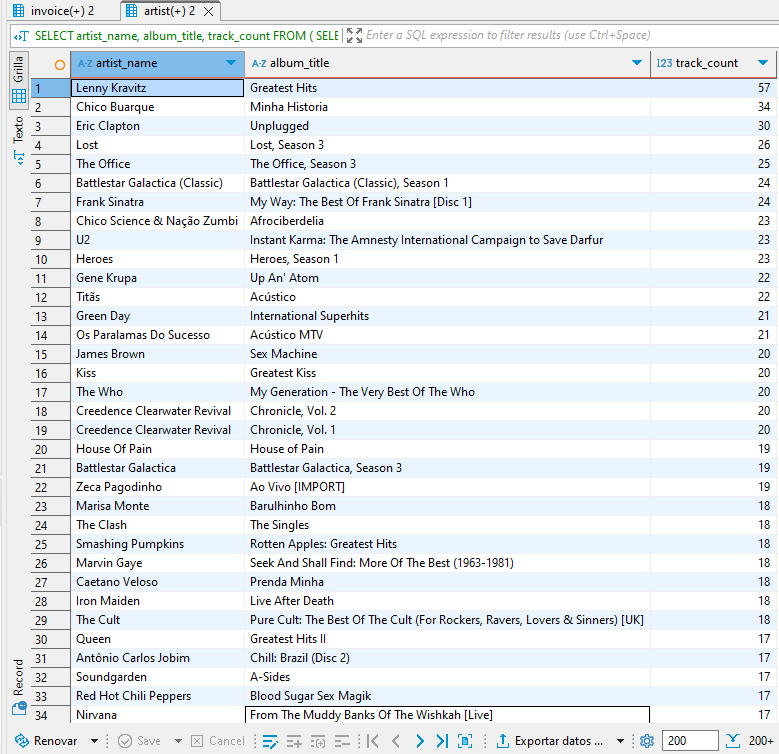

#### **11. Selecciona todas las pistas que tienen la palabra "love" en su título.**


``` sql -- 
SELECT * FROM track
WHERE name ILIKE '%love%';
```

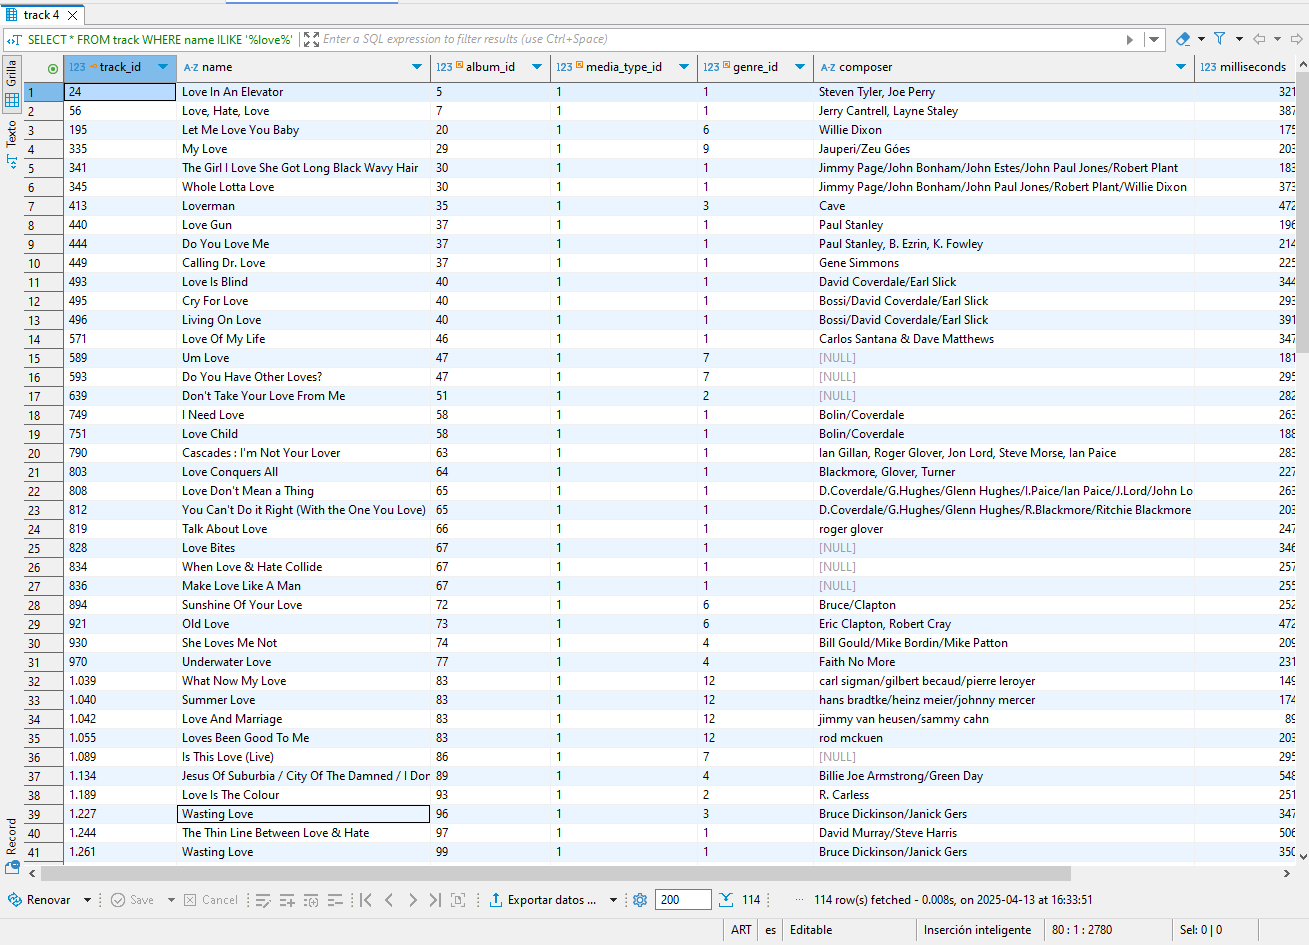

#### **12. Selecciona a todos los clientes cuyo primer nombre comienza con 'A'.**


``` sql -- 
SELECT * FROM customer
WHERE first_name ILIKE 'A%';
```

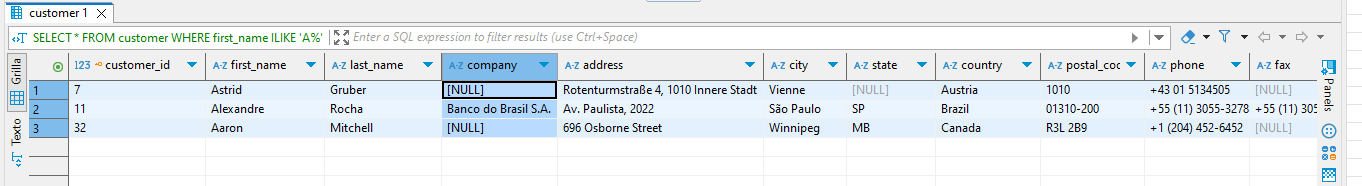

#### **13.Calcula el porcentaje del total de la factura que representa cada factura.**


``` sql -- 
SELECT invoice_id, total,
       ROUND((total / SUM(total) OVER()) * 100, 2) AS percentage_of_total
FROM invoice;
```

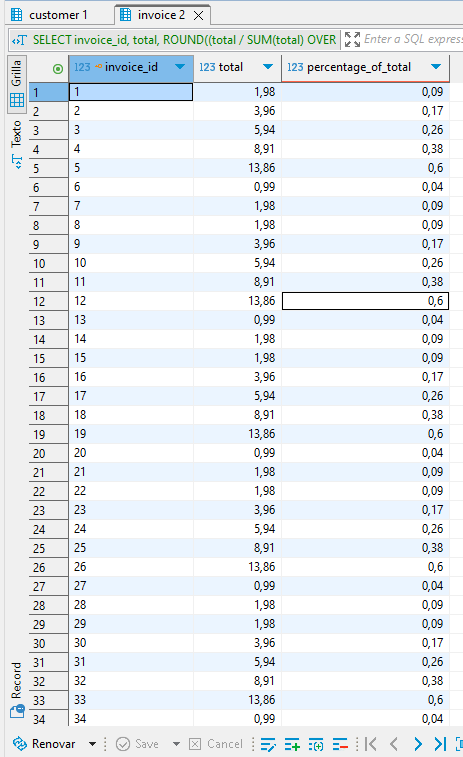

#### **14. Calcula el porcentaje de pistas que representa cada género.**


``` sql -- 
SELECT 
    g.genre_id, 
    g.name AS genre_name,
    COUNT(*) AS genre_count,
    ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER()), 2) AS percentage
FROM track t
JOIN genre g ON t.genre_id = g.genre_id
GROUP BY g.genre_id, g.name
ORDER BY g.genre_id;
```

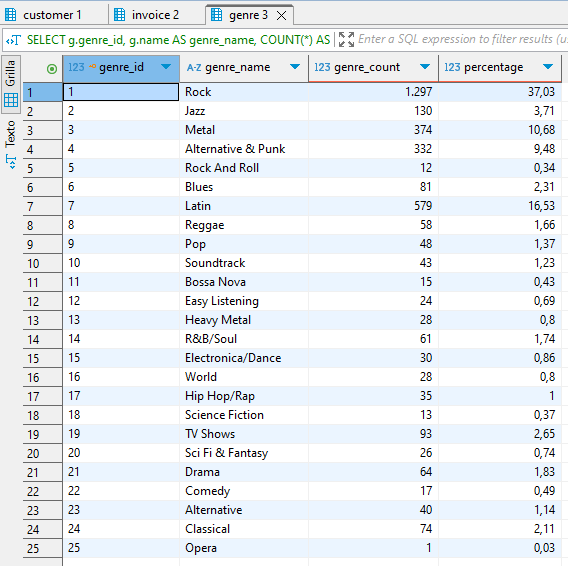

#### **15. Para cada cliente, compara su gasto total con el del cliente que gastó más.**


``` sql -- 
SELECT 
    s.customer_id,
    c.first_name,
    c.last_name,
    s.total_spent,
    MAX(s.total_spent) OVER() - s.total_spent AS difference_with_top_spender
FROM (
    SELECT customer_id, SUM(total) AS total_spent
    FROM invoice
    GROUP BY customer_id
) AS s
JOIN customer c ON s.customer_id = c.customer_id
ORDER BY s.total_spent DESC;
```

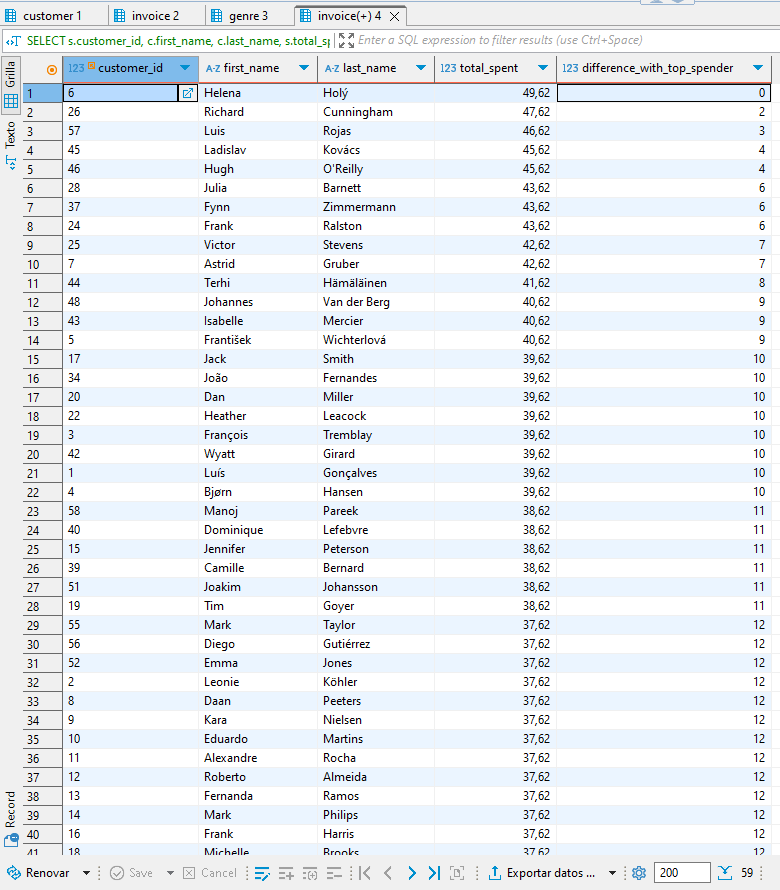

#### **16. Para cada factura, calcula la diferencia en el gasto total entre ella y la factura anterior.**


``` sql -- 
SELECT invoice_id, total,
       total - LAG(total) OVER (ORDER BY invoice_id) AS difference_with_previous
FROM invoice;
```

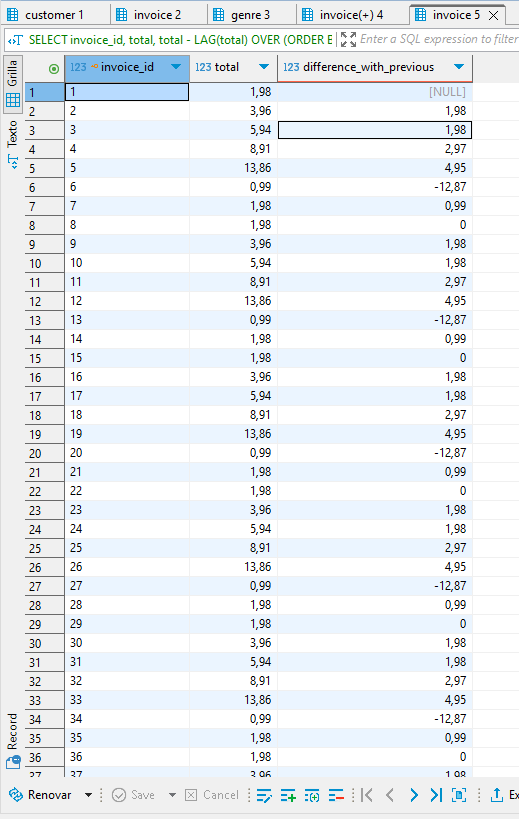

#### **17. Para cada factura, calcula la diferencia en el gasto total entre ella y la próxima factura.**


``` sql -- 
SELECT invoice_id, total,
       LEAD(total) OVER (ORDER BY invoice_id) - total AS difference_with_next
FROM invoice;
```

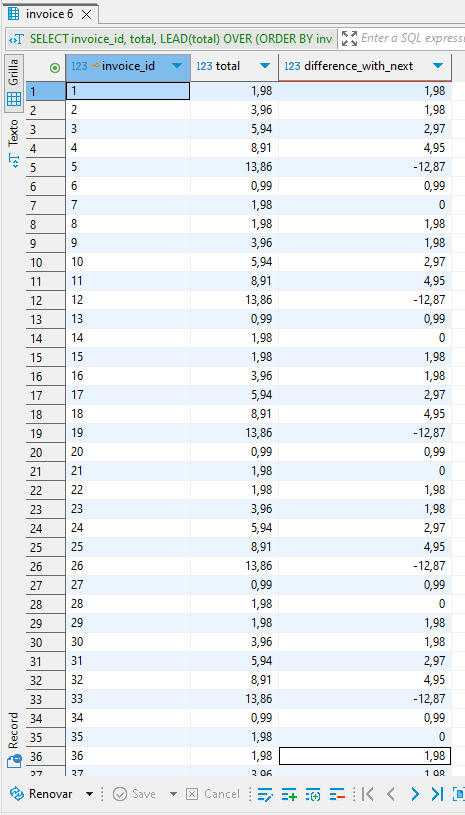

#### **18. Encuentra al artista con el mayor número de pistas para cada género.**


``` sql -- 
SELECT 
    g.genre_id,
    g.name AS genre_name,
    a.artist_id,
    a.name AS artist_name,
    ranked.track_count
FROM (
    SELECT 
        t.genre_id, 
        al.artist_id, 
        COUNT(*) AS track_count,
        RANK() OVER (PARTITION BY t.genre_id ORDER BY COUNT(*) DESC) AS rank
    FROM track t
    JOIN album al ON t.album_id = al.album_id
    JOIN artist a ON al.artist_id = a.artist_id
    GROUP BY t.genre_id, al.artist_id
) AS ranked
JOIN genre g ON ranked.genre_id = g.genre_id
JOIN artist a ON ranked.artist_id = a.artist_id
WHERE ranked.rank = 1
ORDER BY g.genre_id;
```

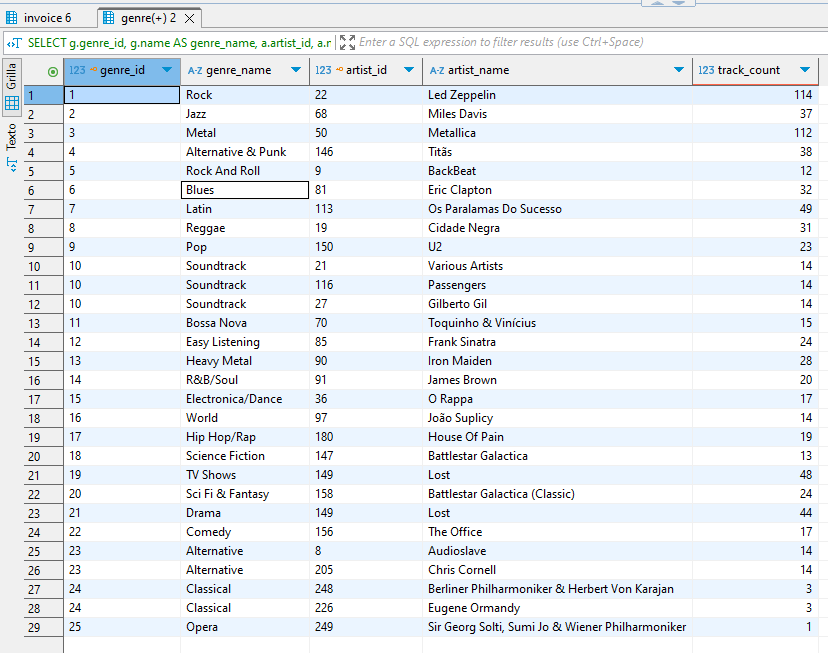

#### **19. Compara el total de la última factura de cada cliente con el total de su factura anterior.**


``` sql -- 
SELECT 
    i.customer_id,
    c.first_name,
    c.last_name,
    i.invoice_id,
    i.total,
    i.total - LAG(i.total) OVER (PARTITION BY i.customer_id ORDER BY i.invoice_date) AS difference_with_previous
FROM invoice i
JOIN customer c ON i.customer_id = c.customer_id
ORDER BY i.customer_id, i.invoice_date;
```

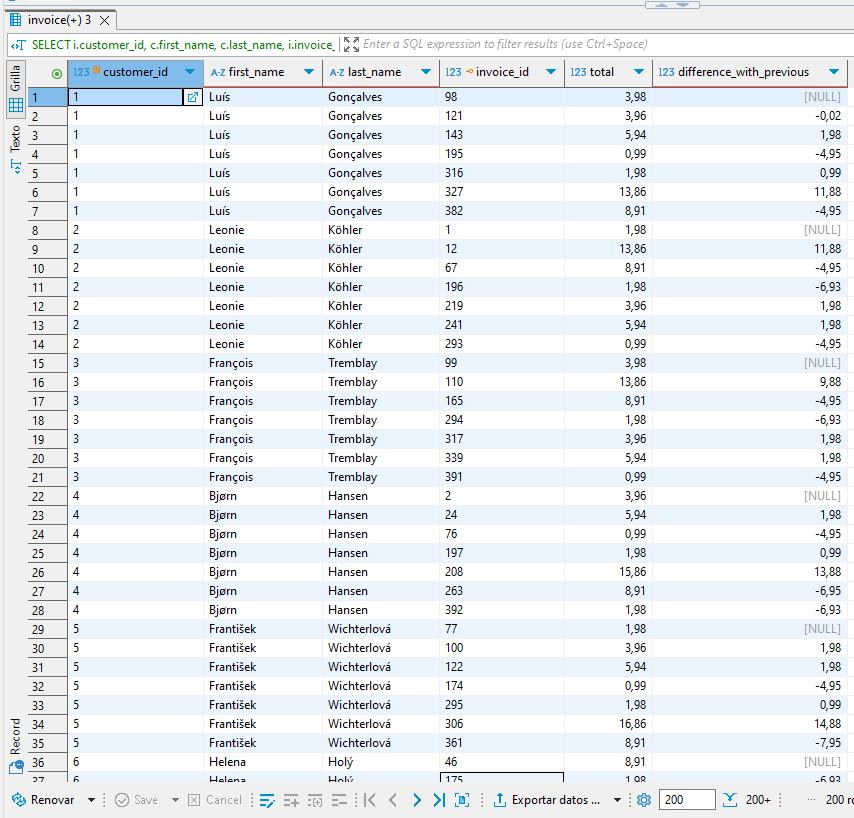

#### **20. Encuentra cuántas pistas de más de 3 minutos tiene cada álbum.**

``` sql -- 
SELECT 
    a.album_id,
    a.title AS album_title,
    COUNT(t.track_id) AS tracks_over_3min
FROM track t
JOIN album a ON t.album_id = a.album_id
WHERE t.milliseconds > 180000
GROUP BY a.album_id, a.title
ORDER BY a.album_id;
```

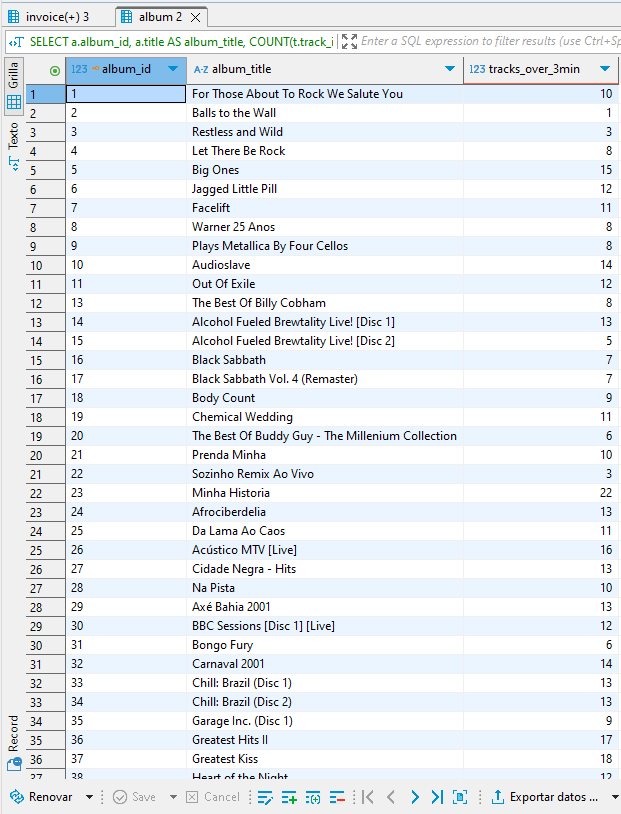